__Adoptable Dogs__


The data is a compilation of information on dogs who were available for adoption on December 12, 2019 in the Hungarian Database of Homeless Pets. In total, there were 2,937 dogs in the database. It contains information on dogs' names, breed, color, age, sex, the date they were found, and some characteristics of their personalities.

https://www.kaggle.com/datasets/jmolitoris/adoptable-dogs/data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load the dataset
data = pd.read_csv('ShelterDogs.csv')

In [100]:
# Let's take a look at the first few rows of the dataset
data.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [5]:
# Check the data types of the columns
data.dtypes


ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
dtype: object

In [6]:
# Check for missing values
data.isnull().sum()

ID                      0
name                   92
age                     0
sex                     0
breed                   0
date_found              0
adoptable_from          0
posted                  0
color                   0
coat                    0
size                    0
neutered             1085
housebroken          2477
likes_people          938
likes_children       1718
get_along_males      1304
get_along_females    1264
get_along_cats       2506
keep_in              1021
dtype: int64

>> Columns: housebroken and get_along_cats have over 2000 missing values (2937 dogs)
* housebroken - 460 non-null
* get_along_cats - 431 non-null
>> Columns: neutered, likes_people, likes_children, get_along_males, get_along_females have over 1000 missing values.

In [18]:
data.columns

Index(['ID', 'name', 'age', 'sex', 'breed', 'date_found', 'adoptable_from',
       'posted', 'color', 'coat', 'size', 'neutered', 'housebroken',
       'likes_people', 'likes_children', 'get_along_males',
       'get_along_females', 'get_along_cats', 'keep_in'],
      dtype='object')

In [62]:
# Set seaborn style
sns.set(style="whitegrid")

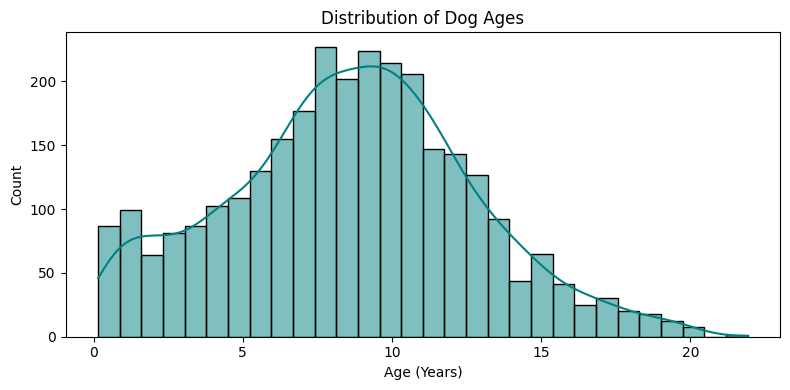

In [ ]:
# Distribution of dog ages
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Dog Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20624\3578059102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_breeds.values, y=top_breeds.index, palette='crest')


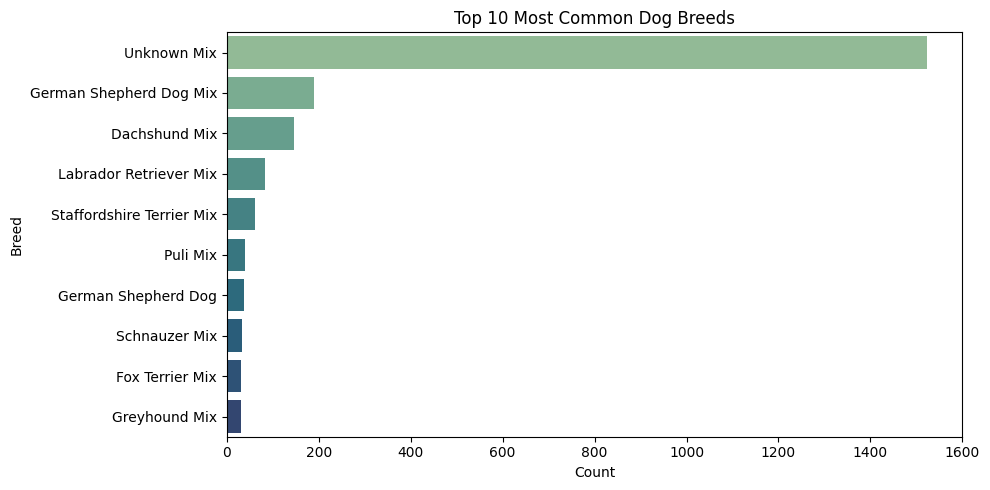

In [ ]:
# Top 10 most common breeds
plt.figure(figsize=(10, 5))
top_breeds = data['breed'].value_counts().nlargest(10)
sns.barplot(x=top_breeds.values, y=top_breeds.index, palette='crest')
plt.title('Top 10 Most Common Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20624\2987364352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette='Set2')


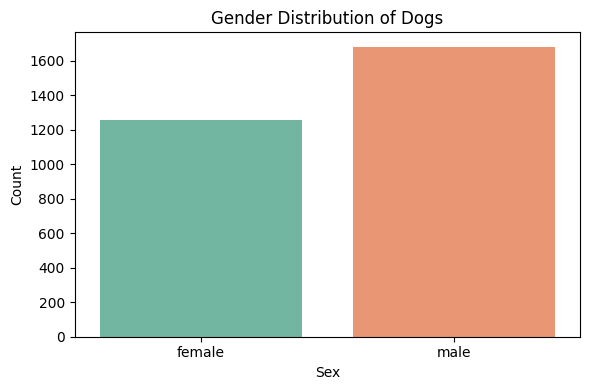

In [ ]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data, palette='Set2')
plt.title('Gender Distribution of Dogs')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

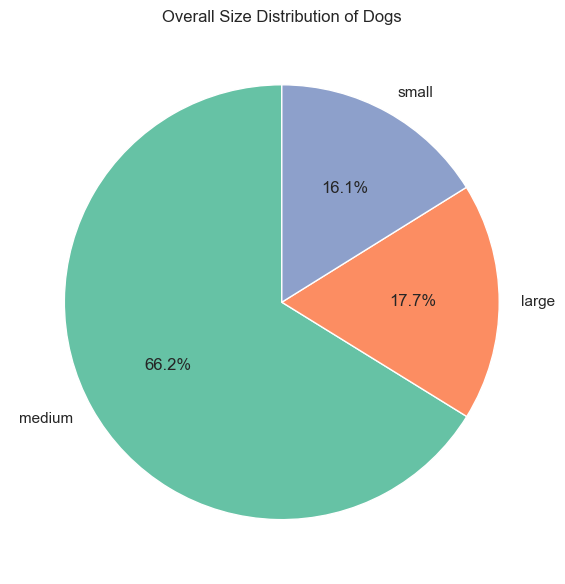

In [ ]:
# Pie Chart for size distribution
plt.figure(figsize=(6, 6))
data['size'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Overall Size Distribution of Dogs')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [80]:
data.coat.value_counts()

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20624\2796114933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='coat', data=data, order=data['coat'].value_counts().head(10).index, palette='pastel')


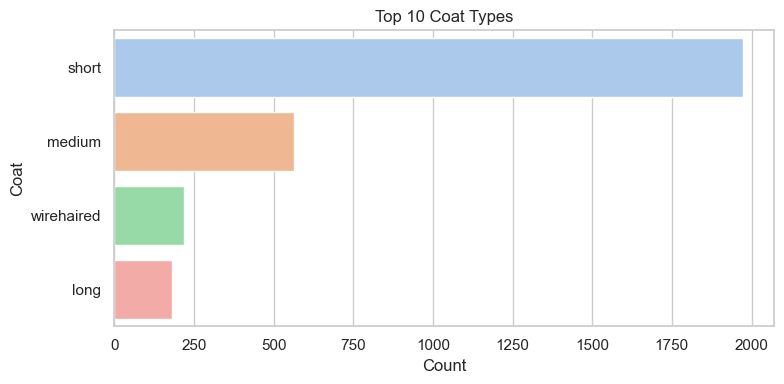

In [79]:
# Top 10 coat types
plt.figure(figsize=(8, 4))
sns.countplot(y='coat', data=data, order=data['coat'].value_counts().head(10).index, palette='pastel')
plt.title('Top 10 Coat Types')
plt.xlabel('Count')
plt.ylabel('Coat')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20624\3431348948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='color', data=data, order=data['color'].value_counts().head(10).index, palette='light:b')


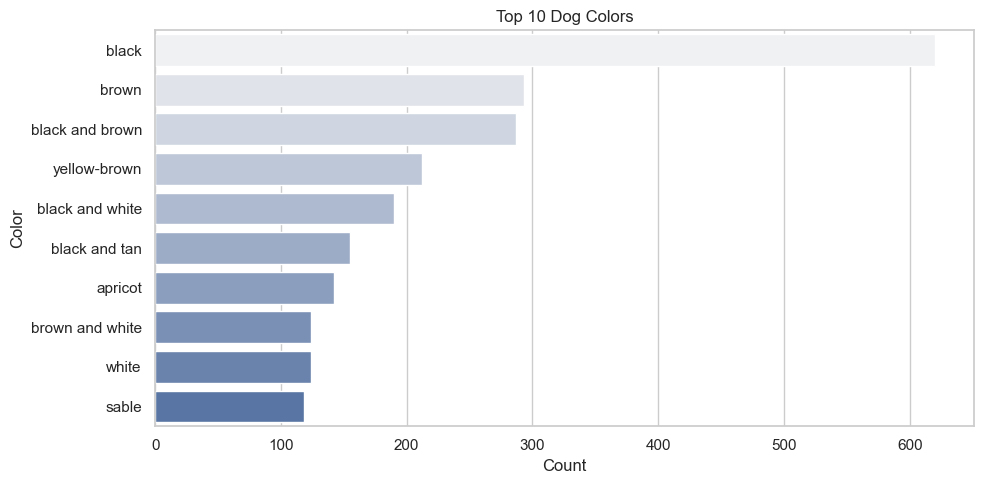

In [95]:
# Top 10 dog colors
plt.figure(figsize=(10, 5))
sns.countplot(y='color', data=data, order=data['color'].value_counts().head(10).index, palette='light:b')
plt.title('Top 10 Dog Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20624\1842675259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='age', data=data, palette='coolwarm')


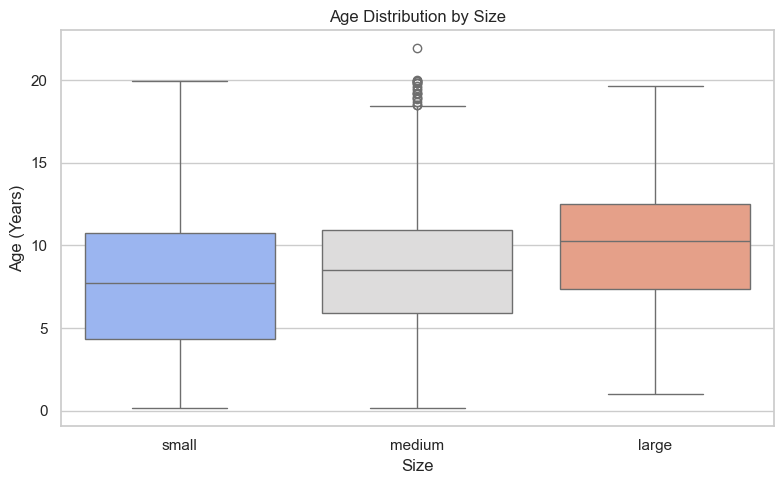

In [96]:
# Age vs. Size (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='size', y='age', data=data, palette='coolwarm')
plt.title('Age Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Age (Years)')
plt.tight_layout()
plt.show()

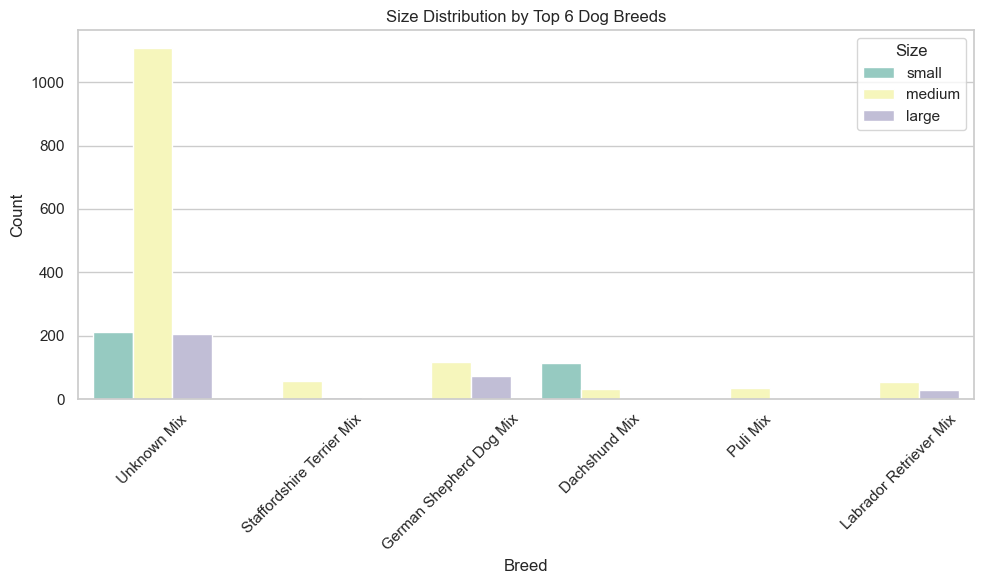

In [63]:
# Let's see how "medium", "large", and "small" dogs are distributed within each breed
# Select top 6 most common breeds
top_breeds = data['breed'].value_counts().nlargest(6).index

# Filter dataset
filtered_data = data[data['breed'].isin(top_breeds)]

# Create grouped bar chart: Size distribution by breed
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='breed', hue='size', palette='Set3')
plt.title('Size Distribution by Top 6 Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.tight_layout()
plt.show()

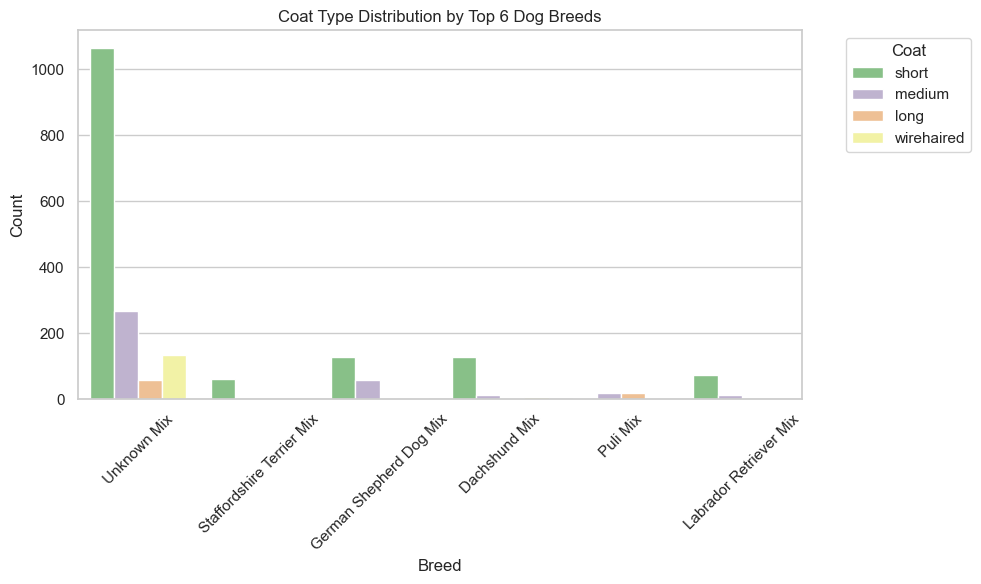

In [ ]:
#  Coat grouped by breed
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='breed', hue='coat', palette='Accent')
plt.title('Coat Type Distribution by Top 6 Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Coat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> The "Unknown Mix" represents different breeds of dogs and it's logical that tends to vary more in size.

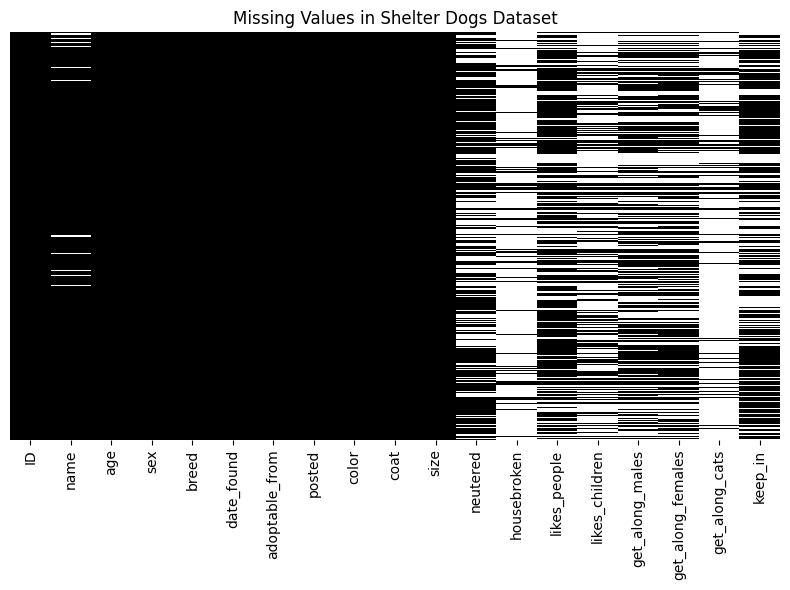

In [57]:
# 5. Heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='cubehelix')
plt.title('Missing Values in Shelter Dogs Dataset')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20624\3951666984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='Greens')


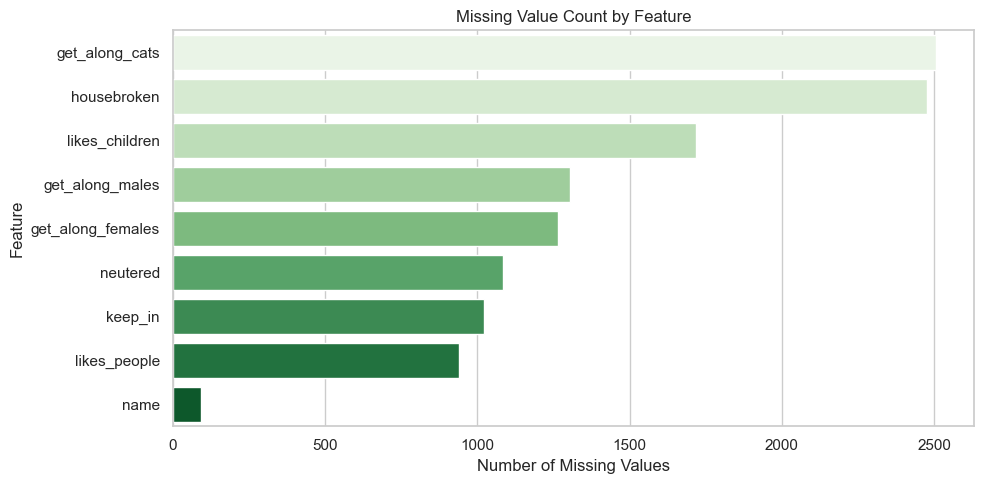

In [102]:
# Missing data count (barplot)
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='Greens')
plt.title('Missing Value Count by Feature')
plt.xlabel('Number of Missing Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

> Key visual insights from the ShelterDogs dataset:

__General Dog Characteristics__


<u>Age Distribution:</u>

Most dogs are under 5 years old.

There's a high concentration of very young dogs (<1 year).


<u>Size Distribution:</u>

Majority of dogs are labeled as "small" and "medium".

Large dogs are less common overall.


<u>Breed:</u>

“Unknown Mix” is by far the most common breed label, followed by a few named breeds.


<u>Color:</u>

Most common colors include black, brown, and black and white.

Color data is diverse, with over 100 unique entries.


<u>Coat Types:</u>

Short coat dominates the dataset, followed by medium and long coats.

Very few dogs have "wire" or "hairless" coat types.

__Demographics__

<u>Gender:</u>

Slightly more male than female dogs.


<u>Neutering Status:</u>

Many dogs are not neutered, although ~1,000 entries are missing this info.

__Data Quality__

<u>Missing Values:</u>

Significant missing data in behavioral columns:

housebroken, likes_children, get_along_cats have 50–85% missing.

Core attributes like age, sex, breed, and size are mostly complete.

__Trait Distributions__ (Grouped by Breed)

<u>Size by Breed:</u>

Some breeds (e.g. French Bulldog Mix) are almost exclusively small.

Mixed breeds show more size diversity.


<u>Color & Coat by Breed:</u>

Color variety is broad across breeds, with some breed-color pairings being more consistent.

Coat types tend to align with breed-specific expectations (e.g., Huskies with medium/long coats).

__Suggestions for Modeling__

Focus on complete columns (age, sex, breed, size, color, coat) for initial models.

Treat Unknown Mix as a separate class or consider breed clustering.

Missing behavioral traits could be predicted with ML or excluded from early modeling.




> Let's remove those columns with missing values. The columns "name" seems to be not relevant for modeling.

In [ ]:
data_dropped = data.drop(columns=['name', 'neutered', 'housebroken', 'likes_people', 'likes_children', 'get_along_males', 'get_along_females', 'get_along_cats'])

In [68]:
data.head()

,ID,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,keep_in
0,23807,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,NaN
1,533,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,NaN
2,23793,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,NaN
3,23795,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,NaN
4,23806,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,NaN
